### 14. Monte Carlo simulations of the 2D Ising model
Generalize your simulation program for the 1D Ising model of problems 12 respectively 13 to two dimensions (ideally you may rewrite it
immediately for general dimensions $D$). Consider square lattices with
linear lengths $L = 4, 8,$ and $16$ and periodic boundary conditions for
a larger temperature range ($ J\,/\, k_B T= 0, . . . , 1$) in vanishing magnetic
field and compare your simulation results for the energy and specific
heat with exact results (see the module homepage).

<div style="text-align: right;font-weight:bold;font-size:large">Till Pfaff<br>3789265</div>
Full code available at https://github.com/till-robert/cs1_seminar/tree/main/task14

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def avg_E_analytical(beta,N):
    J = 1
    return -(N-1) * J * np.tanh(beta*J)

def C_analytical(beta,N):
    J = 1
    k = 1
    return (N-1) * J**2 * k * beta**2 / (np.cosh(beta*J)**2)

In [2]:
# omega = np.loadtxt("../task07/out/omega.txt").T #Ω(E,M)

# E_counted = np.arange(-19,20,2)
# M_counted = np.arange(-20,21,2)

# def Z(beta):
#     return np.sum(omega * np.exp(-beta*E_counted))
# def avg_E_counted(beta):
#     return 1/Z(beta) * np.sum(np.sum(omega,axis=0) * E_counted * np.exp(-beta*E_counted))
# def avg_M_counted(beta):
#     return 1/Z(beta) * np.sum(np.sum(omega.T * M_counted) *  np.exp(-beta*E_counted))
# def avg_E_counted_sq(beta):
#     return 1/Z(beta) * np.sum(np.sum(omega,axis=0) * E_counted**2 * np.exp(-beta*E_counted))
# def avg_M_counted_sq(beta):
#     return 1/Z(beta) * np.sum(np.sum(omega.T * M_counted**2) *  np.exp(-beta*E_counted))


# C_counted = lambda beta: beta**2 *(avg_E_counted_sq(beta)-avg_E_counted(beta)**2)
# chi_counted = lambda beta: beta * avg_M_counted_sq(beta)



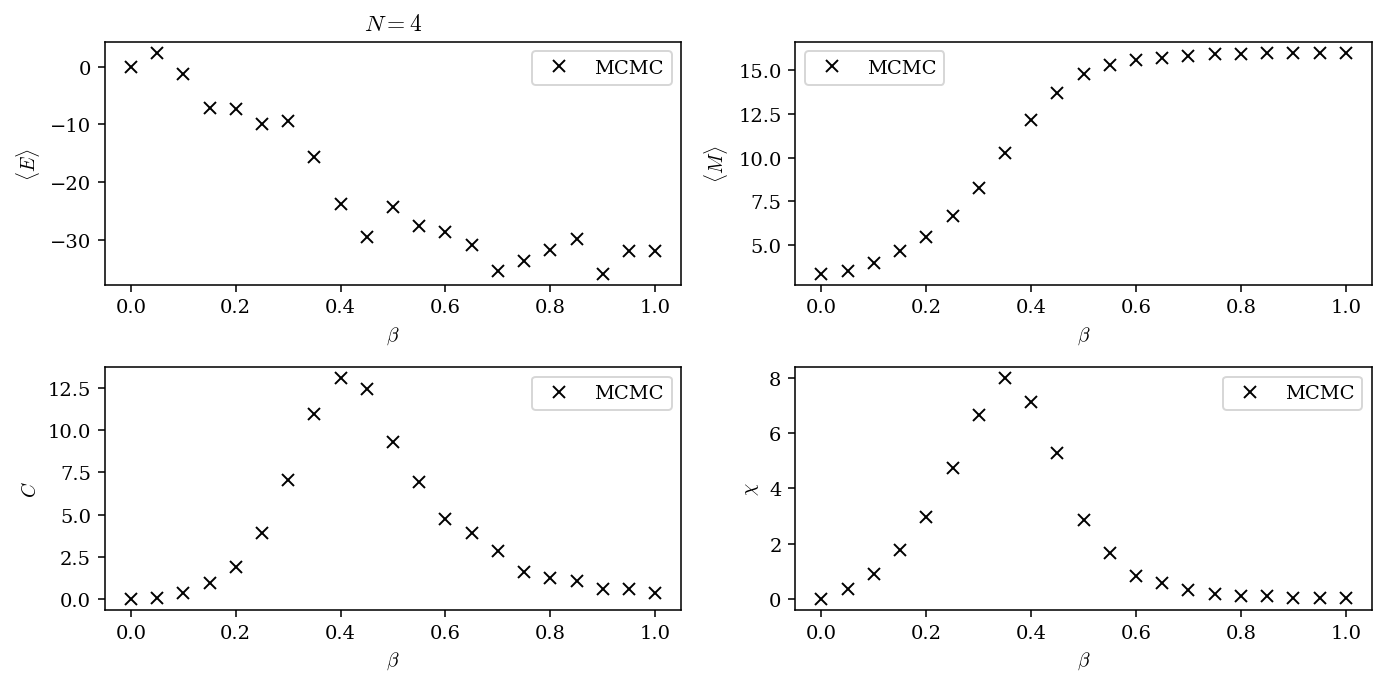

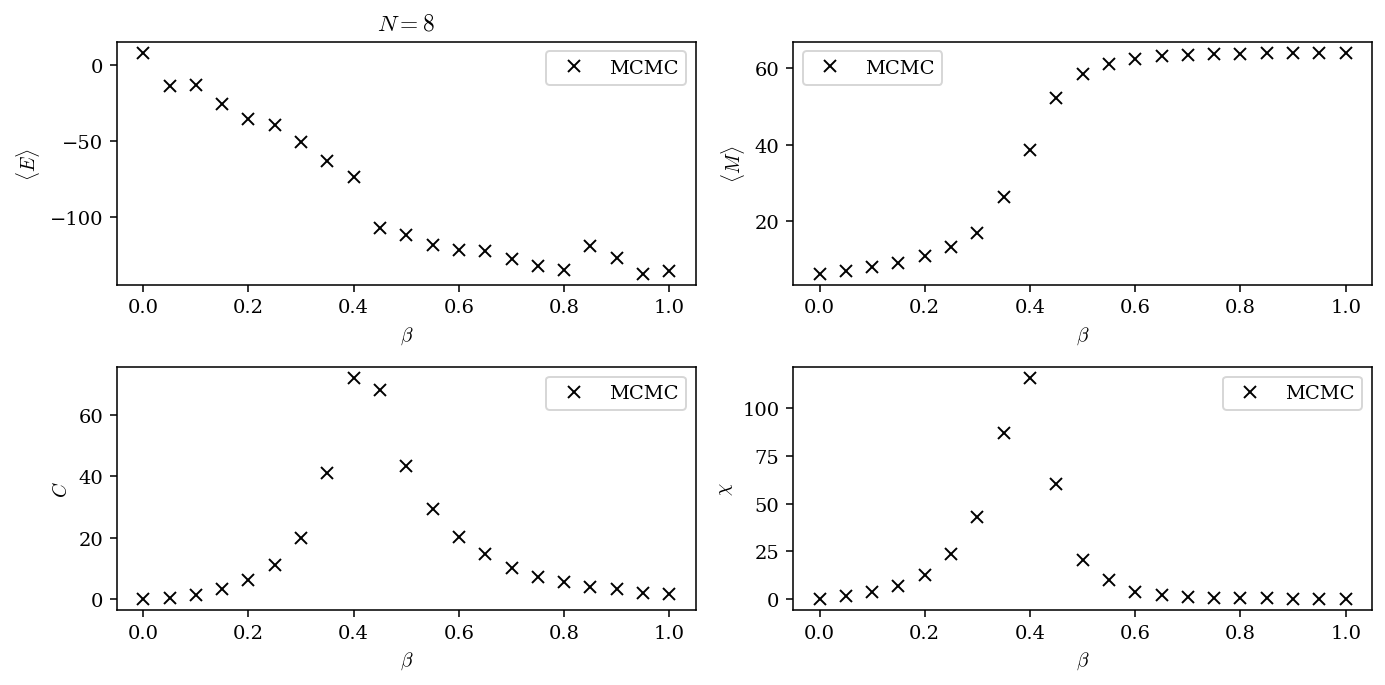

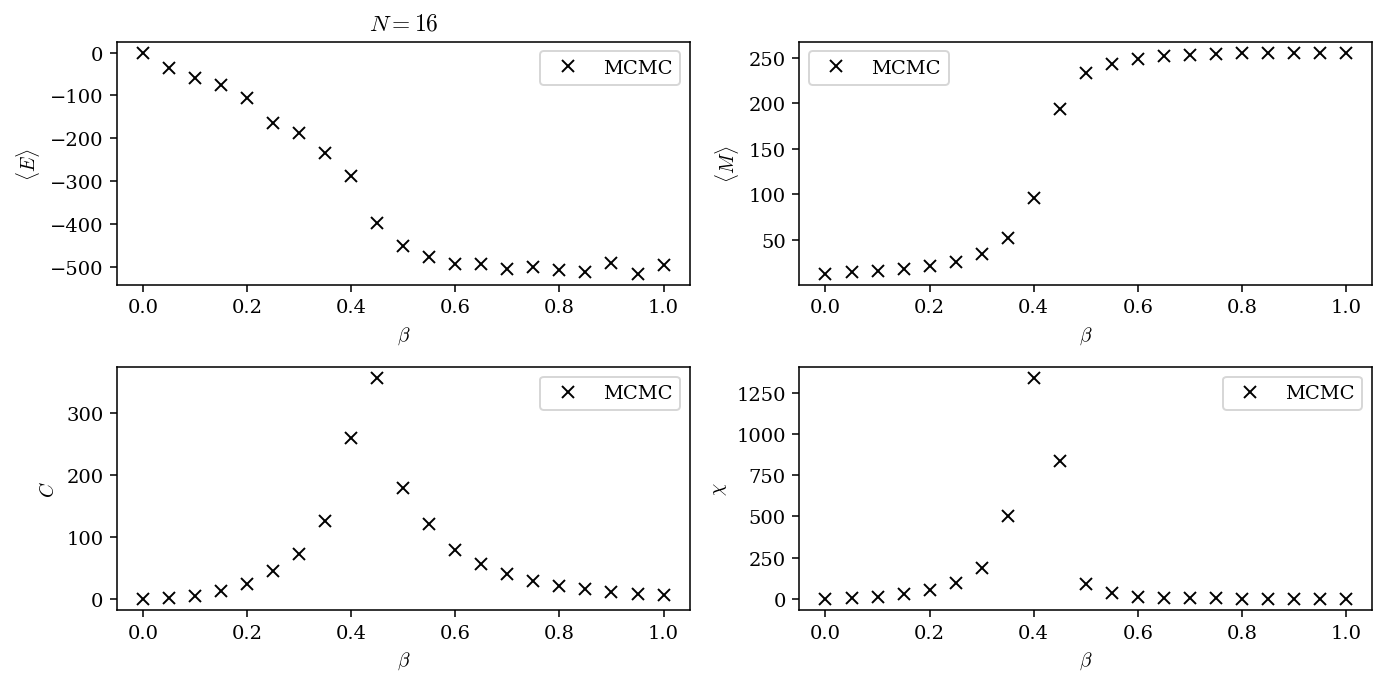

In [3]:
N_spins_arr = np.array([4,8,16])
#beta_range = np.linspace(-0.1,2.1,200)


for i,N_spins in enumerate(N_spins_arr):
    beta, E_J, M,C,chi = np.loadtxt(f"out/{N_spins}.txt").T
    plt.figure(figsize=(10, 5))

    plt.subplot(2,2,1)
    plt.title(r"$N = " + str(N_spins) + r"$")
    plt.ylabel(r"$\langle E\rangle$")
    plt.xlabel(r"$\beta$")
    # plt.plot(beta_range, avg_E_analytical(beta_range,N_spins), "b--", lw=0.7, label="Analytical")
    # if(N_spins == 20):
    #      plt.plot(beta, [avg_E_counted(beta_val) for beta_val in beta], "r.", lw=0.7, label="Counted")
    plt.plot(beta,E_J,"kx", label="MCMC")
    plt.legend()
    # plt.axvline(measure,ymin=0,ymax=1,color="orange",ls="dashed")
    plt.subplot(2,2,2)
    plt.ylabel(r"$\langle M\rangle$")
    plt.xlabel(r"$\beta$")
    # if(N_spins == 20):
    #     plt.plot(beta, [avg_M_counted(beta_val) for beta_val in beta], "r.", lw=0.7, label="Counted")
    plt.plot(beta,M,"kx", label="MCMC")
    plt.legend()

    plt.subplot(2,2,3)
    plt.ylabel(r"$C$")
    plt.xlabel(r"$\beta$")
    # plt.plot(beta_range, C_analytical(beta_range,N_spins), "b--", lw=0.7, label="Analytical")
    # if(N_spins == 20):
    #     plt.plot(beta, [C_counted(beta_val) for beta_val in beta], "r.", lw=0.7, label="Counted")
    plt.plot(beta,C, "kx",label="MCMC")
    plt.legend()

    plt.subplot(2,2,4)
    plt.ylabel(r"$\chi$")
    plt.xlabel(r"$\beta$")
    # if(N_spins == 20):
    #     plt.plot(beta, [chi_counted(beta_val) for beta_val in beta], "r.", lw=0.7, label="Counted")
    plt.plot(beta,chi,"kx", label="MCMC")
    plt.legend()

    plt.show()
